In [174]:
import requests as req
from geopy import distance
import requests as req
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial import distance
import matplotlib.cm as cm
import matplotlib.colors as colors
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [107]:
def get_url(from_index: int, size: int) -> str:
    url = 'https://glue-api.vivareal.com/v2/listings?addressCity=Aracaju&addressLocationId=BR%3ESergipe%3ENULL%3EAracaju&addressNeighborhood=&addressState=Sergipe&addressCountry=Brasil&addressStreet=&addressZone=&addressPointLat=-10.947247&addressPointLon=-37.073082&business=SALE&facets=amenities&unitTypes=&unitSubTypes=&unitTypesV3=&usageTypes=&listingType=USED&parentId=null&categoryPage=RESULT&includeFields=search(result(listings(listing(displayAddressType%2Camenities%2CusableAreas%2CconstructionStatus%2ClistingType%2Cdescription%2Ctitle%2CunitTypes%2CnonActivationReason%2CpropertyType%2CunitSubTypes%2Cid%2Cportal%2CparkingSpaces%2Caddress%2Csuites%2CpublicationType%2CexternalId%2Cbathrooms%2CusageTypes%2CtotalAreas%2CadvertiserId%2Cbedrooms%2CpricingInfos%2CshowPrice%2Cstatus%2CadvertiserContact%2CvideoTourLink%2CwhatsappNumber%2Cstamps)%2Caccount(id%2Cname%2ClogoUrl%2ClicenseNumber%2CshowAddress%2ClegacyVivarealId%2Cphones)%2Cmedias%2CaccountLink%2Clink))%2CtotalCount)%2Cpage%2CseasonalCampaigns%2CfullUriFragments%2Cnearby(search(result(listings(listing(displayAddressType%2Camenities%2CusableAreas%2CconstructionStatus%2ClistingType%2Cdescription%2Ctitle%2CunitTypes%2CnonActivationReason%2CpropertyType%2CunitSubTypes%2Cid%2Cportal%2CparkingSpaces%2Caddress%2Csuites%2CpublicationType%2CexternalId%2Cbathrooms%2CusageTypes%2CtotalAreas%2CadvertiserId%2Cbedrooms%2CpricingInfos%2CshowPrice%2Cstatus%2CadvertiserContact%2CvideoTourLink%2CwhatsappNumber%2Cstamps)%2Caccount(id%2Cname%2ClogoUrl%2ClicenseNumber%2CshowAddress%2ClegacyVivarealId%2Cphones)%2Cmedias%2CaccountLink%2Clink))%2CtotalCount))%2Cexpansion(search(result(listings(listing(displayAddressType%2Camenities%2CusableAreas%2CconstructionStatus%2ClistingType%2Cdescription%2Ctitle%2CunitTypes%2CnonActivationReason%2CpropertyType%2CunitSubTypes%2Cid%2Cportal%2CparkingSpaces%2Caddress%2Csuites%2CpublicationType%2CexternalId%2Cbathrooms%2CusageTypes%2CtotalAreas%2CadvertiserId%2Cbedrooms%2CpricingInfos%2CshowPrice%2Cstatus%2CadvertiserContact%2CvideoTourLink%2CwhatsappNumber%2Cstamps)%2Caccount(id%2Cname%2ClogoUrl%2ClicenseNumber%2CshowAddress%2ClegacyVivarealId%2Cphones)%2Cmedias%2CaccountLink%2Clink))%2CtotalCount))%2Caccount(id%2Cname%2ClogoUrl%2ClicenseNumber%2CshowAddress%2ClegacyVivarealId%2Cphones%2Cphones)%2Cfacets%2Cdevelopments(search(result(listings(listing(displayAddressType%2Camenities%2CusableAreas%2CconstructionStatus%2ClistingType%2Cdescription%2Ctitle%2CunitTypes%2CnonActivationReason%2CpropertyType%2CunitSubTypes%2Cid%2Cportal%2CparkingSpaces%2Caddress%2Csuites%2CpublicationType%2CexternalId%2Cbathrooms%2CusageTypes%2CtotalAreas%2CadvertiserId%2Cbedrooms%2CpricingInfos%2CshowPrice%2Cstatus%2CadvertiserContact%2CvideoTourLink%2CwhatsappNumber%2Cstamps)%2Caccount(id%2Cname%2ClogoUrl%2ClicenseNumber%2CshowAddress%2ClegacyVivarealId%2Cphones)%2Cmedias%2CaccountLink%2Clink))%2CtotalCount))%2Cowners(search(result(listings(listing(displayAddressType%2Camenities%2CusableAreas%2CconstructionStatus%2ClistingType%2Cdescription%2Ctitle%2CunitTypes%2CnonActivationReason%2CpropertyType%2CunitSubTypes%2Cid%2Cportal%2CparkingSpaces%2Caddress%2Csuites%2CpublicationType%2CexternalId%2Cbathrooms%2CusageTypes%2CtotalAreas%2CadvertiserId%2Cbedrooms%2CpricingInfos%2CshowPrice%2Cstatus%2CadvertiserContact%2CvideoTourLink%2CwhatsappNumber%2Cstamps)%2Caccount(id%2Cname%2ClogoUrl%2ClicenseNumber%2CshowAddress%2ClegacyVivarealId%2Cphones)%2Cmedias%2CaccountLink%2Clink))%2CtotalCount))&size={}&from={}&q=&developmentsSize=5&__vt=&levels=CITY&ref=%2Fvenda%2Fsergipe%2Faracaju%2F&pointRadius='\
      .format(str(size), str(from_index))
    return url


def get_jsons_houses(number_of_results: int, step: int = 20) -> [dict]:
    list_of_houses = []
    for i in range(0, number_of_results, step):
        url = get_url(i, step)
        headers = {
            'authority': 'glue-api.vivareal.com',
            'accept': 'application/json, text/javascript, */*; q=0.01',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36 Edg/89.0.774.63',
            'x-domain': 'www.vivareal.com.br',
            'origin': 'https://www.vivareal.com.br',
            'sec-fetch-site': 'cross-site',
            'sec-fetch-mode': 'cors',
            'sec-fetch-dest': 'empty',
            'referer': 'https://www.vivareal.com.br/',
            'accept-language': 'en-US,en;q=0.9,pt;q=0.8',
            'Cookie': '__cfduid=d1cabec6a9887e305de3f7b63ef4fe2621617378099; __cfruid=b84bbd6e502c03d118060d0082307549ddeb6572-1617379768'
        }
        response = req.get(url, headers=headers).json()
        try:
            list_of_houses.extend(response['search']['result']['listings'])
        except KeyError as e:
            print(step, i, url)
            print(response)
    return list_of_houses

def remove_zona(x: str):
    result = x
    par_open = x.find('(')
    if par_open != -1:
        par_close = x.find(')')
        result = x[par_open+1:par_close if par_close != -1 else len(x)]
    return result

def get_df_houses(jsons) -> pd.DataFrame:
    features = []
    for json in jsons:
        try:
            listing = json['listing']
            show_price = listing['showPrice']
            active = listing['status']
            if show_price and active == 'ACTIVE':
                title = listing['title']
                price = listing['pricingInfos'][0]['price']
                address = listing['address']
                neighborhood = address['neighborhood']
                latitude = address['point']['lat']
                longitude = address['point']['lon']
                features.append([title, active, price, neighborhood, latitude, longitude])
        except KeyError as e:
            # print(f"Error: {e} {json} ")
            continue
    df = pd.DataFrame(columns=["title", 'status', 'price', 'neighborhood', 'lat', 'long'], data=features)
    df['price'] = df['price'].astype('float')
    df['neighborhood'] = df['neighborhood'].apply(remove_zona)
    df['id_casa'] = [i for i in range(len(df))]
    return df

In [108]:
jsons = get_jsons_houses(3000, 350)
df = get_df_houses(jsons)
df.drop([660, 481], inplace=True) # Removed due to inconsistence of the data
df.head()

,title,status,price,neighborhood,lat,long,id_casa
0,Apartamento para venda com 89 metros quadrados...,ACTIVE,380000.0,Coroa do Meio,-10.973608,-37.041682,0
1,Apartamento para venda tem 115 metros quadrado...,ACTIVE,453000.0,Jardins,-10.939460,-37.060452,1
2,Lote/Terreno para venda possui 455 metros quad...,ACTIVE,655000.0,Aruana,-11.015738,-37.077281,2
3,Casa para venda possui 300 metros quadrados co...,ACTIVE,700000.0,Coroa do Meio,-10.974654,-37.041492,3
4,Casa no Condomínio Fragatta para venda a 400 m...,ACTIVE,780000.0,Robalo,-11.022747,-37.080257,4


In [109]:
df.describe()

,price,lat,long,id_casa
count,9.400000e+02,940.000000,940.000000,940.000000
mean,6.283336e+05,-10.956159,-37.066897,470.287234
std,1.303414e+06,0.039424,0.017514,272.295360
min,5.000000e+03,-11.114943,-37.149152,0.000000
25%,2.200000e+05,-10.974765,-37.075394,234.750000
50%,3.600000e+05,-10.943953,-37.063108,469.500000
75%,6.500000e+05,-10.930758,-37.055100,706.250000
max,2.230000e+07,-10.878623,-37.037086,941.000000


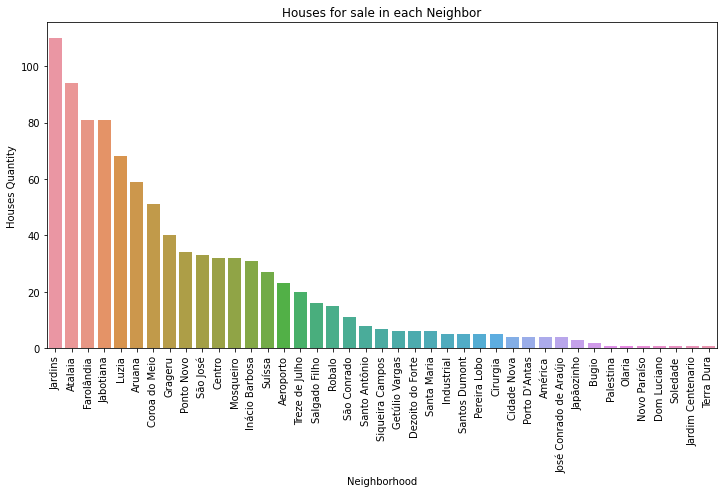

In [149]:
df_houses_per_neighborhood = df.groupby('neighborhood').size().reset_index().drop(0).sort_values(0, ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df_houses_per_neighborhood['neighborhood'], y=df_houses_per_neighborhood[0])
ax.set(xlabel="Neighborhood", ylabel="Houses Quantity")
plt.title('Houses for sale in each Neighbor')
for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()


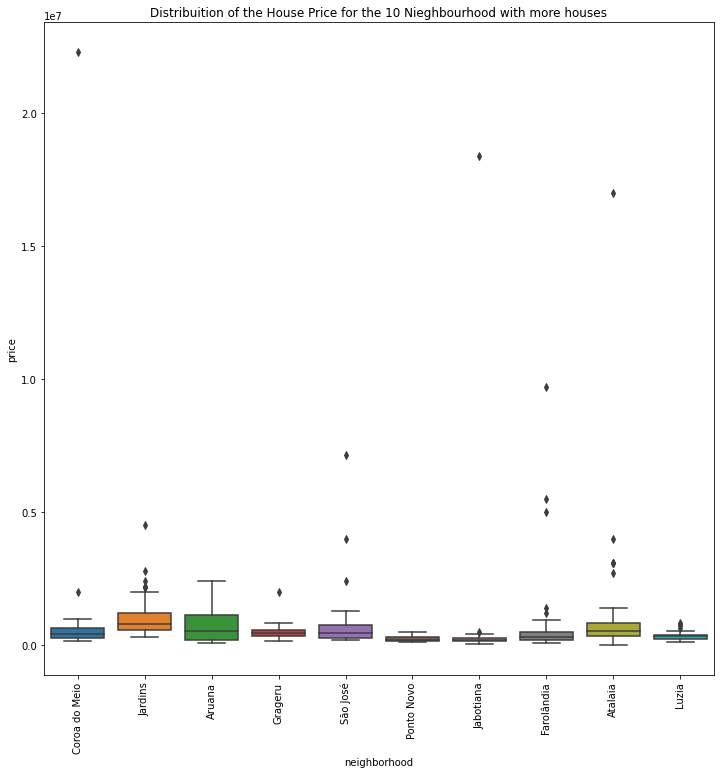

In [111]:
mylist = df_houses_per_neighborhood['neighborhood'][:10]
pattern = '|'.join(mylist)
plt.figure(figsize=(12, 12))
df_dist_plot_prices = df[df['neighborhood'].str.contains(pattern)]
ax = sns.boxplot(x='neighborhood', y='price', data=df_dist_plot_prices)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Distribuition of the House Price for the 10 Nieghbourhood with more houses")
plt.show()

In [ ]:
map_houses = folium.Map(location=[-10.964945, -37.055780],zoom_start=12)

for lat, lon, price in zip(df['lat'], df['long'], df['price']):
    label = folium.Popup(str(price), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#fc03c2',
        fill=True,
        fill_color='#fc03c2',
        fill_opacity=0.7).add_to(map_houses)
  
map_houses     

In [113]:
CLIENT_ID = ''
CLIENT_SECRET = ''
VERSION = ''
LIMIT = 1000

In [114]:
def get_venues_in_radius(lat: float, long: float, radius: int):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius,
        LIMIT)
    response = req.get(url)
    while str(response.status_code) != '200':
      print('Error during request: Trying again')
      response = req.get(url)
    r = response.json()['response']['groups'][0]['items']

    return r


def get_venues(lat, long, radius):
    venues = get_venues_in_radius(lat, long, radius)
    return venues


def get_features_dataframe(df: pd.DataFrame, radius: int) -> pd.DataFrame:
    venues_list = []
    for id_casa, name, lat, long, price in zip(df['id_casa'], df["neighborhood"], df["lat"], df["long"], df['price']):
        print(f'{name} {lat} {long}')
        results = get_venues(lat, long, radius)

        venues_list.append([(
            id_casa,
            name,
            lat,
            long,
            price,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['id_casa',
                             'neighborhood',
                             'n_lat',
                             'n_long',
                             'price',
                             'venue',
                             'v_lat',
                             'v_long',
                             'v_cat']

    return nearby_venues

In [115]:
def get_one_hot_category_df(df: pd.DataFrame) -> pd.DataFrame:
    result = pd.get_dummies(df['v_cat'], prefix_sep='_', prefix='cat')
    result["id_casa"] = df["id_casa"]
    c = ["id_casa"] + list(result.columns[:-1])
    result = result[c]

    result = result.groupby("id_casa").mean().reset_index()

    return result


def get_kmeans_clusters(k: int, one_hot_df: pd.DataFrame) -> KMeans:
    x = one_hot_df.iloc[:, 1:]
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10, max_iter=1000).fit(x)
    return kmeans


def get_best_k(max_k: int, one_hot_df: pd.DataFrame):
    scores = np.zeros(max_k + 1)
    best_inertia = -1
    for k in range(1, max_k + 1):
        kmeans = get_kmeans_clusters(k, one_hot_df)
        scores[k] = kmeans.inertia_
    plt.figure(figsize=(18, 8))
    plt.xlabel("K")
    plt.ylabel("Inertia")
    plt.title("Elbow Analysis")
    plt.plot(list(range(1, max_k + 1)), scores[1:], 'bx-')
    plt.xticks(ticks=list(range(1, max_k + 1, 2)), rotation='vertical')
    plt.show()

In [ ]:
df_venues_categories = get_features_dataframe(df, 600) ### Get venues information


In [117]:
print(df_venues_categories['v_cat'].unique().shape)
print(df_venues_categories.shape)

(235,)
(29140, 9)


In [176]:
df_hist = df_venues_categories[df_venues_categories['neighborhood'] != ''].groupby(['neighborhood', 'v_cat']).count()[['id_casa']].reset_index().rename(columns={'id_casa': 'Quantity', 'neighborhood': 'Neighborhood', 'v_cat': 'Categorie'})
df_hist.sort_values('Quantity', ascending=False).head(15)

,Neighborhood,Categorie,Quantity
182,Atalaia,Hotel,440
906,Jardins,Café,378
146,Atalaia,Bed & Breakfast,320
419,Coroa do Meio,Hotel,295
922,Jardins,Fast Food Restaurant,269
901,Jardins,Brazilian Restaurant,262
493,Farolândia,Bar,221
931,Jardins,Gym / Fitness Center,213
152,Atalaia,Brazilian Restaurant,212
179,Atalaia,Gym / Fitness Center,190


In [119]:
df_one_hot_category = get_one_hot_category_df(df_venues_categories)
df_one_hot_category.head()

,id_casa,cat_Acai House,cat_Accessories Store,cat_Airport,cat_Airport Lounge,cat_Airport Service,cat_American Restaurant,cat_Aquarium,cat_Arcade,cat_Argentinian Restaurant,cat_Art Gallery,cat_Arts & Crafts Store,cat_Arts & Entertainment,cat_Asian Restaurant,cat_Athletics & Sports,cat_Australian Restaurant,cat_Auto Garage,cat_Auto Workshop,cat_BBQ Joint,cat_Bagel Shop,cat_Baiano Restaurant,cat_Bakery,cat_Bar,cat_Baseball Stadium,cat_Bay,cat_Beach,cat_Beach Bar,cat_Bed & Breakfast,cat_Beer Bar,cat_Beer Garden,cat_Beer Store,cat_Betting Shop,cat_Big Box Store,cat_Bike Rental / Bike Share,cat_Bistro,cat_Board Shop,cat_Boat or Ferry,cat_Bookstore,cat_Boutique,cat_Bowling Alley,...,cat_Shop & Service,cat_Shopping Mall,cat_Shopping Plaza,cat_Skating Rink,cat_Snack Place,cat_Soccer Field,cat_Soccer Stadium,cat_Soup Place,cat_Souvenir Shop,cat_Spa,cat_Sporting Goods Shop,cat_Sports Bar,cat_Steakhouse,cat_Supermarket,cat_Surf Spot,cat_Sushi Restaurant,cat_Tapas Restaurant,cat_Tapiocaria,cat_Tattoo Parlor,cat_Tea Room,cat_Tennis Court,cat_Thai Restaurant,cat_Theater,cat_Theme Park,cat_Thrift / Vintage Store,cat_Tourist Information Center,cat_Toy / Game Store,cat_Track,cat_Vegetarian / Vegan Restaurant,cat_Veterinarian,cat_Video Game Store,cat_Video Store,cat_Warehouse Store,cat_Water Park,cat_Waterfront,cat_Wine Bar,cat_Wine Shop,cat_Wings Joint,cat_Women's Store,cat_Yoga Studio
0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.016393,0.032787,0.0,0.0,0.0,0.000000,0.0,0.0,0.016393,0.0,0.0,0.016393,0.016393,0.0,0.0,0.0,0.0,0.016393,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.016393,0.000000,0.0,0.0,0.065574,0.016393,0.0,0.0,0.016393,0.0,0.0,0.0,0.016393,0.000000,0.0,0.0,0.0,0.032787,0.000000,0.000000,0.016393,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.016393,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.010309,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.010309,0.0,0.0,0.020619,0.0,0.0,0.010309,0.010309,0.0,0.0,0.0,0.0,0.000000,0.0,0.010309,0.0,0.0,0.0,0.0,0.010309,0.0,0.0,0.010309,0.0,0.0,...,0.000000,0.010309,0.0,0.0,0.020619,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.020619,0.0,0.0,0.0,0.000000,0.010309,0.010309,0.000000,0.0,0.0,0.0,0.0,0.010309,0.0,0.0,0.0,0.0,0.0,0.0,0.010309,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.015625,0.0,0.0,0.015625,0.031250,0.0,0.0,0.0,0.000000,0.0,0.0,0.015625,0.0,0.0,0.015625,0.015625,0.0,0.0,0.0,0.0,0.031250,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.015625,0.000000,0.0,0.0,0.062500,0.015625,0.0,0.0,0.015625,0.0,0.0,0.0,0.015625,0.000000,0.0,0.0,0.0,0.031250,0.000000,0.000000,0.015625,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015625,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
# df_one_hot_category.set_index('id_casa', inplace=True)
max_values = df_one_hot_category.max().sort_values(0, ascending=False).reset_index()
max_values.drop(0, inplace=True)
l = []
for i, m in zip(max_values['index'], max_values[0]):
  rs = df_one_hot_category[df_one_hot_category[i] == m]
  l.append((
        rs.iloc[0,0],
        i,
        m
    ))
result = pd.DataFrame(columns=['id_casa', 'cat', 'max'], data=l)
result = pd.merge(result, df, how="inner", on='id_casa')
result

,id_casa,cat,max,title,status,price,neighborhood,lat,long
0,448,cat_Nightclub,1.000000,"Recanto das Árvores, Apto para venda com 60 m²...",ACTIVE,160000.0,Jabotiana,-10.935012,-37.092053
1,909,cat_Beach,1.000000,Cobertura no Condomínio Portal dos Trópicos,ACTIVE,1300000.0,Mosqueiro,-11.114943,-37.135631
2,42,cat_Music Venue,1.000000,Apartamento para venda com 52 metros quadrados...,ACTIVE,139000.0,Aruana,-11.023229,-37.088323
3,423,cat_Restaurant,1.000000,Otima casa com piscina no residencial Porto Ma...,ACTIVE,350000.0,Aruana,-10.992687,-37.084501
4,465,cat_Lounge,1.000000,Oportuidade de casa em construção na Praia do ...,ACTIVE,250000.0,Robalo,-11.050761,-37.099877
...,...,...,...,...,...,...,...,...,...
230,602,cat_Tapas Restaurant,0.016393,Apartamento para venda com 90 metros quadrados...,ACTIVE,320000.0,Atalaia,-10.994058,-37.053563
231,27,cat_Hotel Pool,0.014493,Vendo Apartamento no Clube Atalaia - 120 M2 Vi...,ACTIVE,680000.0,Atalaia,-10.992538,-37.053644
232,122,cat_Monument / Landmark,0.014085,Apartamento para venda com 343 metros quadrado...,ACTIVE,2703174.0,Atalaia,-10.988074,-37.053451
233,256,cat_Men's Store,0.013889,Condomínio Ícone Residence,ACTIVE,350000.0,Luzia,-10.939912,-37.063910


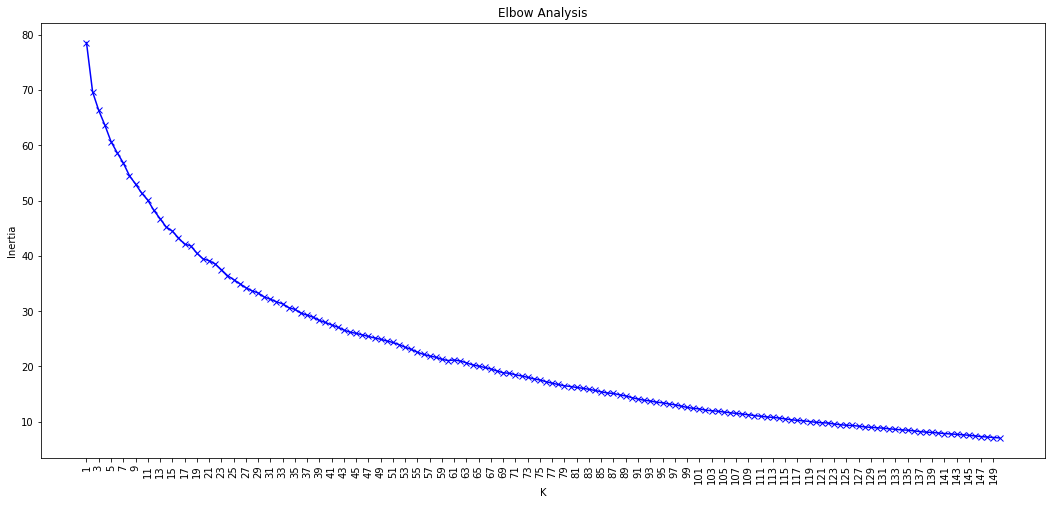

In [121]:
get_best_k(150, df_one_hot_category)

In [136]:
K = 25
kmeans = get_kmeans_clusters(K, df_one_hot_category)
labels = kmeans.labels_
df_labels = pd.DataFrame({'id_casa': df_one_hot_category['id_casa'], 'label': labels})
df_labels.head()
df_clusters = df_venues_categories.iloc[:, :5]
df_clusters = pd.merge(df, df_labels, how="inner", on='id_casa')
df_clusters

,title,status,price,neighborhood,lat,long,id_casa,label
0,Apartamento para venda com 89 metros quadrados...,ACTIVE,380000.0,Coroa do Meio,-10.973608,-37.041682,0,13
1,Apartamento para venda tem 115 metros quadrado...,ACTIVE,453000.0,Jardins,-10.939460,-37.060452,1,3
2,Lote/Terreno para venda possui 455 metros quad...,ACTIVE,655000.0,Aruana,-11.015738,-37.077281,2,18
3,Casa para venda possui 300 metros quadrados co...,ACTIVE,700000.0,Coroa do Meio,-10.974654,-37.041492,3,13
4,Casa no Condomínio Fragatta para venda a 400 m...,ACTIVE,780000.0,Robalo,-11.022747,-37.080257,4,13
...,...,...,...,...,...,...,...,...
932,Condominio Bougainville Residence,ACTIVE,170000.0,Jabotiana,-10.944391,-37.087780,937,7
933,Terreno na Atalaia perto do Terminal de onibus,ACTIVE,4000000.0,Atalaia,-10.988900,-37.055455,938,0
934,Vitta condomínio club,ACTIVE,250000.0,Farolândia,-10.967388,-37.056972,939,21
935,ÁREA BAIRRO SANTA MARIA,ACTIVE,1680000.0,Santa Maria,-10.986321,-37.098553,940,3


In [137]:
df_clusters.groupby('label')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,78.0,1.240357e+06,2.782413e+06,5000.0,400000.00,587500.0,999900.0,18400000.0
1,44.0,5.488407e+05,4.812571e+05,95000.0,178750.00,337500.0,897500.0,1800000.0
2,4.0,3.025000e+06,4.099695e+06,250000.0,400000.00,1425000.0,4050000.0,9000000.0
3,102.0,1.083206e+06,2.221701e+06,105000.0,399999.25,695000.0,1172500.0,22300000.0
4,24.0,2.160208e+05,6.141528e+04,120000.0,173750.00,220000.0,265250.0,330000.0
5,160.0,4.814391e+05,7.432923e+05,60000.0,223750.00,330000.0,466250.0,7150000.0
6,9.0,4.202179e+05,5.782646e+05,139000.0,139961.00,150000.0,180000.0,1800000.0
7,47.0,2.158723e+05,9.271007e+04,57000.0,140000.00,200000.0,265000.0,480000.0
8,17.0,7.514059e+05,5.505070e+05,70000.0,535000.00,650000.0,699000.0,1900000.0


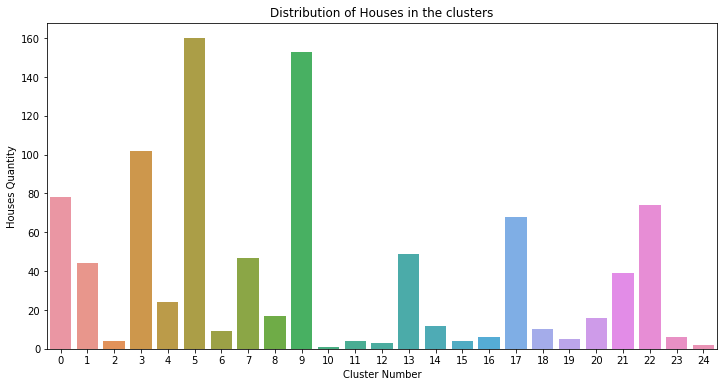

In [138]:
df_cluster_dist = df_clusters.groupby('label').count()[['id_casa']].reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df_cluster_dist['label'], y=df_cluster_dist['id_casa'])
ax.set(xlabel="Cluster Number", ylabel="Houses Quantity")
plt.title('Distribution of Houses in the clusters')
plt.show()

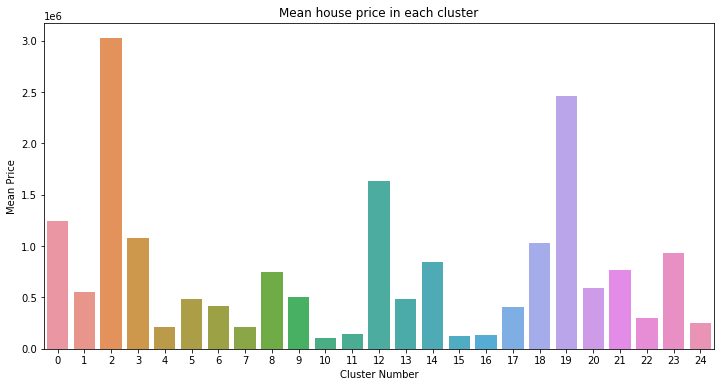

In [139]:
df_grouped_labels = df_clusters[['label', 'price']].groupby('label').mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df_grouped_labels['label'], y=df_grouped_labels['price'])
ax.set(xlabel="Cluster Number", ylabel="Mean Price")
plt.title('Mean house price in each cluster')
plt.show()

In [178]:
# create map
map_clusters = folium.Map(location=[-10.964945, -37.055780],zoom_start=12)

# set color scheme for the clusters
x = np.arange(K)
ys = [i + x + (i*x)**2 for i in range(K)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for code, lat, lon, neighbourhood, cluster, price in zip(df_clusters["id_casa"], df_clusters['lat'], df_clusters['long'], df_clusters['neighborhood'], df_clusters['label'], df_clusters['price']):
    label = folium.Popup(str(f'Price: R${price} ({neighbourhood}) (Label: {cluster})'), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    # folium.Circle([lat, lon],
    #                 radius=600
    #                ).add_to(map_clusters)
       
map_clusters